In [56]:
import numpy as np
from scipy.spatial import distance

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size':22})

%load_ext autoreload
%reload_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


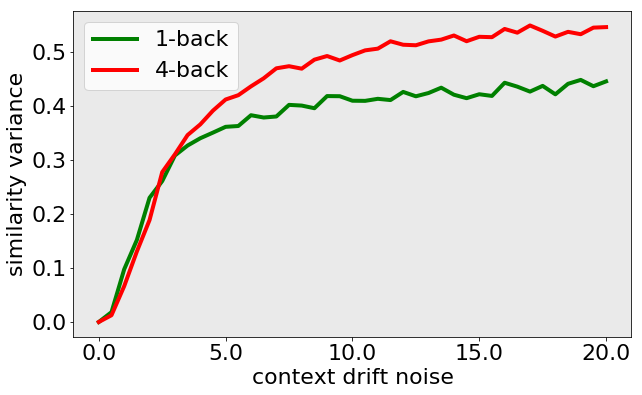

In [65]:
plt.figure(figsize=(10,6))
ax = plt.gca()

alpha = 1
num_itr = 5000
stdL = np.arange(0,20.1,.5)
cL = ['green','red']

for idx,nback in enumerate([1,4]):
  D = -np.ones([num_itr,len(stdL)])

  for std_idx,std in enumerate(stdL):
    for itr in range(num_itr):
      v_t = np.array([1.,1.])
      for step in range(nback+1):
        delta_t = alpha*np.random.normal(1,std,2)
        v_t += delta_t/np.linalg.norm(delta_t)
      D[itr,std_idx] = distance.cosine(np.array([1.,1.]),v_t)

  ax.plot(D.std(0),lw=4,label='%i-back'%nback,color=cL[idx])
  xt = np.arange(0,len(stdL),10)
  ax.set_xticks(xt)
  ax.set_xticklabels(stdL[xt].round(1))
  ax.set_xlabel('context drift noise')
  ax.set_ylabel('similarity variance')
ax.set_facecolor(plt.get_cmap('Greys')(40))
plt.legend()
plt.savefig('figures/driftnoise_similarity_variance_simulations')

Text(0,0.5,'3back similarity variance')

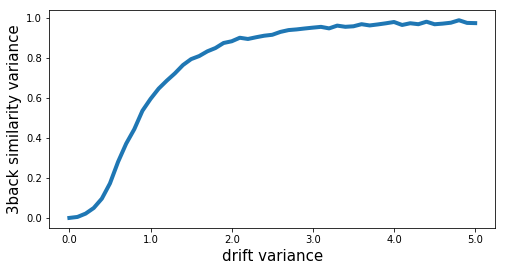

In [13]:

# plt.savefig('figures/drif-variance-simluation')

In [6]:
stdL = np.arange(.1,1,.2)
stdL

array([0.1, 0.3, 0.5, 0.7, 0.9])

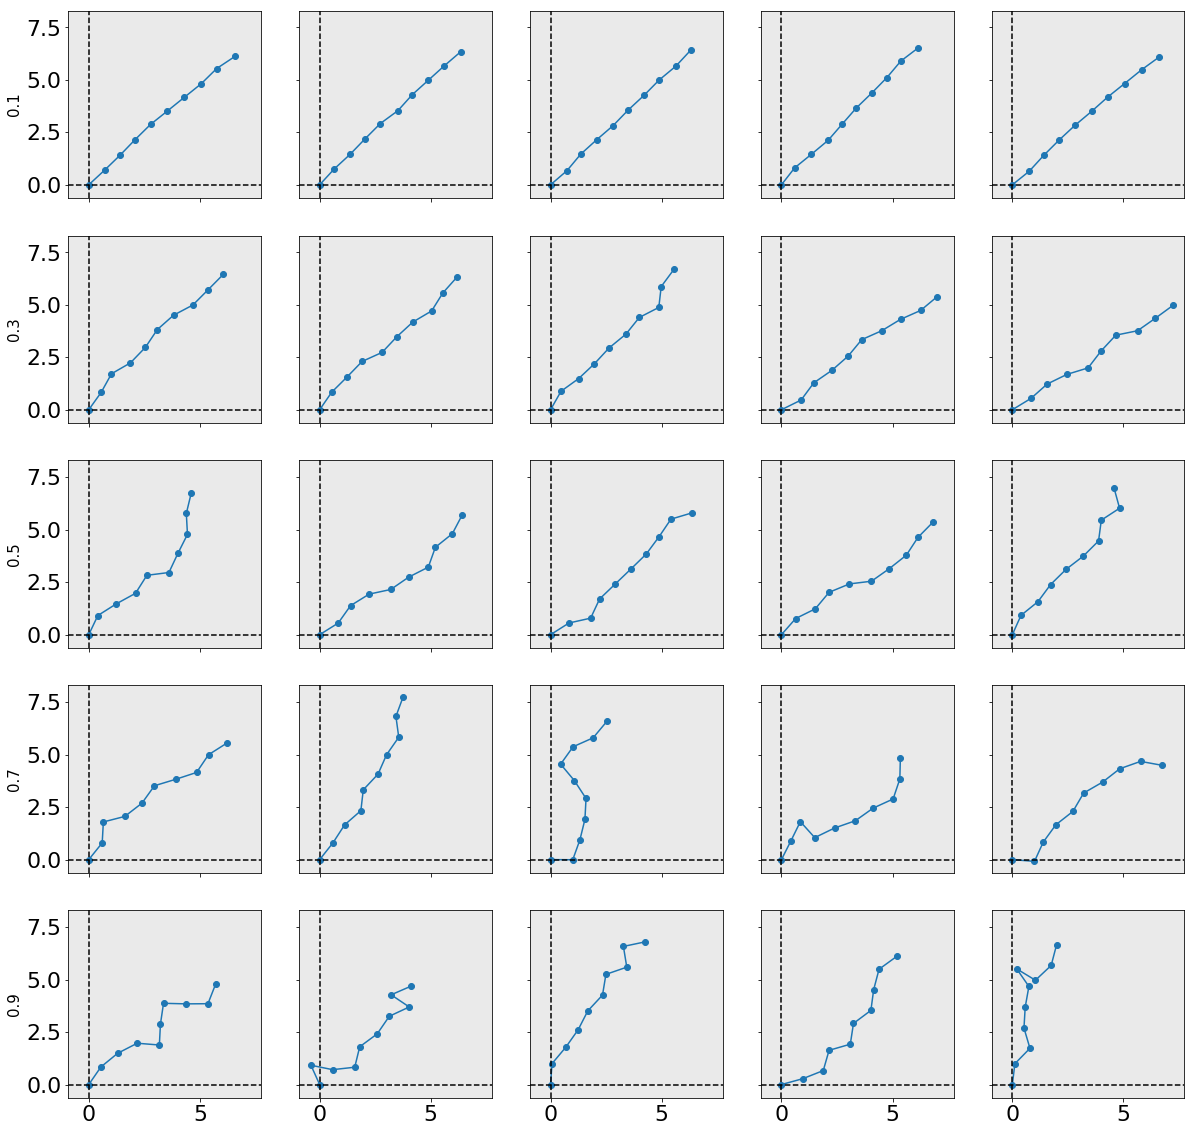

In [66]:
alpha = 1

num_itr = 5
num_steps = 10

stdL = np.arange(.1,1,.2).round(2)
D = -np.ones([num_itr,len(stdL)])
fig,axarr = plt.subplots(5,5,figsize=(20,20),sharex=True,sharey=True)

for std_idx,std in enumerate(stdL):
  for itr in range(num_itr):
    v_t = np.array([0.,0.])
    arr = -np.ones([num_steps,2])
    for step in range(num_steps):
      arr[step] = v_t
      delta_t = alpha*np.random.normal(1,std,2)
      v_t += delta_t/np.linalg.norm(delta_t)
    ax = axarr[std_idx,itr]
    ax.scatter(arr[:,0],arr[:,1])
    ax.plot(arr[:,0],arr[:,1])
    ax.axvline(0,c='black',ls='--')
    ax.axhline(0,c='black',ls='--')
    ax.set_facecolor(plt.get_cmap('Greys')(40))
  axarr[std_idx,0].set_ylabel(std,fontsize=15)
plt.savefig('figures/drif-variance-simluation_samples')


In [12]:
np.ones(1).dtype

dtype('float64')